In [1]:
from osgeo import gdal
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [70]:
ds = gdal.Open('IyoNou_NDVI7_0726.tif')
array = ds.ReadAsArray()

In [71]:
print array.shape
print array.dtype

(4, 10440, 10664)
uint8


In [78]:
new_array = np.zeros((10440, 10664, 3), dtype=np.float32)
new_array[:, :, 0] = array[0, :, :].astype(np.float32)
new_array[:, :, 0][new_array[:, :, 0] == 0] = np.nan

new_array[:, :, 1] = array[1, :, :].astype(np.float32)
new_array[:, :, 1][new_array[:, :, 1] == 0] = np.nan

new_array[:, :, 2] = array[2, :, :].astype(np.float32)
new_array[:, :, 2][new_array[:, :, 2] == 0] = np.nan

#new_array[:, :, 3] = array[3, :, :].astype(np.float32)

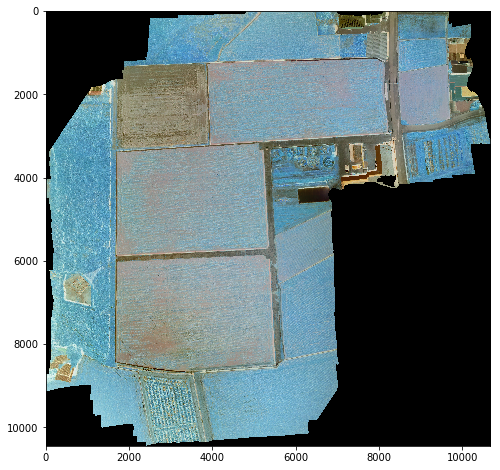

In [79]:
fig = plt.figure(figsize=(8, 8))

plt.imshow(new_array)

plt.show()

In [83]:
nominator = new_array[:, :, 2] - new_array[:, :, 1]
denominator = new_array[:, :, 2] + new_array[:, :, 1]

ndvi = denominator.copy()
index = denominator != 0
ndvi[:] = np.nan
ndvi[index] = nominator[index] / denominator[index]
del nominator, denominator

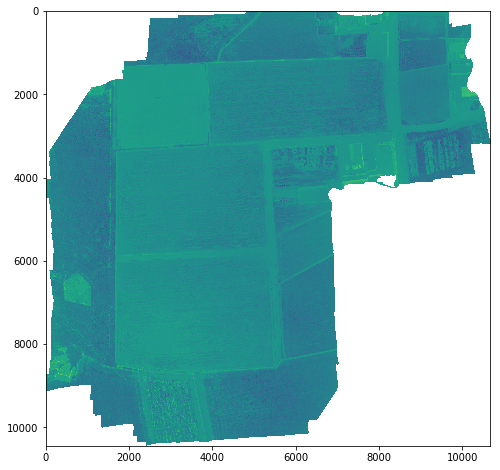

In [84]:
fig = plt.figure(figsize=(8, 8))

plt.imshow(ndvi)

plt.show()

In [31]:
np.nanmean(ndvi)

-0.049303323

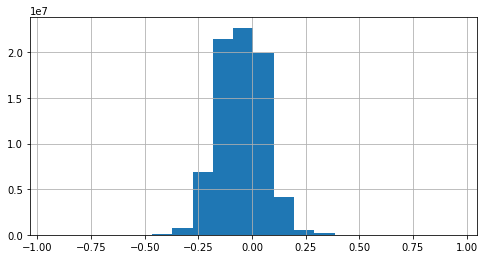

In [85]:
fig = plt.figure(figsize=(8, 4))
plt.hist(ndvi[~np.isnan(ndvi)].flatten(), bins=20)

plt.grid()
plt.show()